# XOR GATE

## 세팅

In [ ]:
import torch

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

## SLP : Single Layer Perceptron

In [ ]:
# nn(neural network) layers : 신경망층 
linear = torch.nn.Linear(2,1,bias = True) # 입력층 2개, 출력층 1개 
sigmoid = torch.nn.Sigmoid()

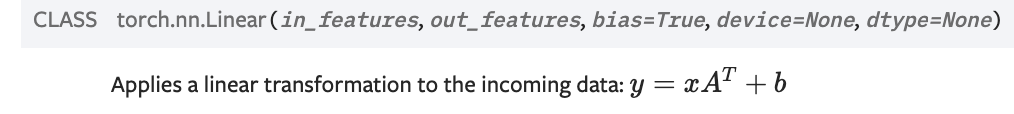

In [ ]:
# model 
model = torch.nn.Sequential(linear, sigmoid).to(device)

In [ ]:
# 손실함수 & 최적화 방식
criterion = torch.nn.BCELoss().to(device) # Binary Cross Entropy 
optimizer = torch.optim.SGD(model.parameters(), lr = 1 ) # Stochastic Gradient Descent 

In [ ]:
for step in range(10001):
  optimizer.zero_grad() # gradient 초기화 
  hypothesis = model(X)

  #손실함수
  cost = criterion(hypothesis, Y)
  cost.backward() # 가중치 W와 편향 b에 대한 기울기를 계산
  optimizer.step() 

  if step % 1000 == 0: 
    print(step, cost.item())

0 0.6931471824645996
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.

-> 한 개의 신경망 층으로는 XOR 게이트를 실현할 수 없음

In [ ]:
# 정확도 계산 
# hypothesis >0.5 = True 

with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print(print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), 
               '\nCorrect: ', predicted.detach().cpu().numpy(), 
               '\nAccuracy: ', accuracy.item()))


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5
None


## MLP : Multiple Layer Perceptron 

In [ ]:
## neural network layers (신경망 층) 
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [ ]:
# 모델 
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)
    # 선형 층1 -> 시그모이드 -> 선형 층2 -> 시그모이드

# 손실함수 
criterion = torch.nn.BCELoss().to(device)

# 최적화 방식
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

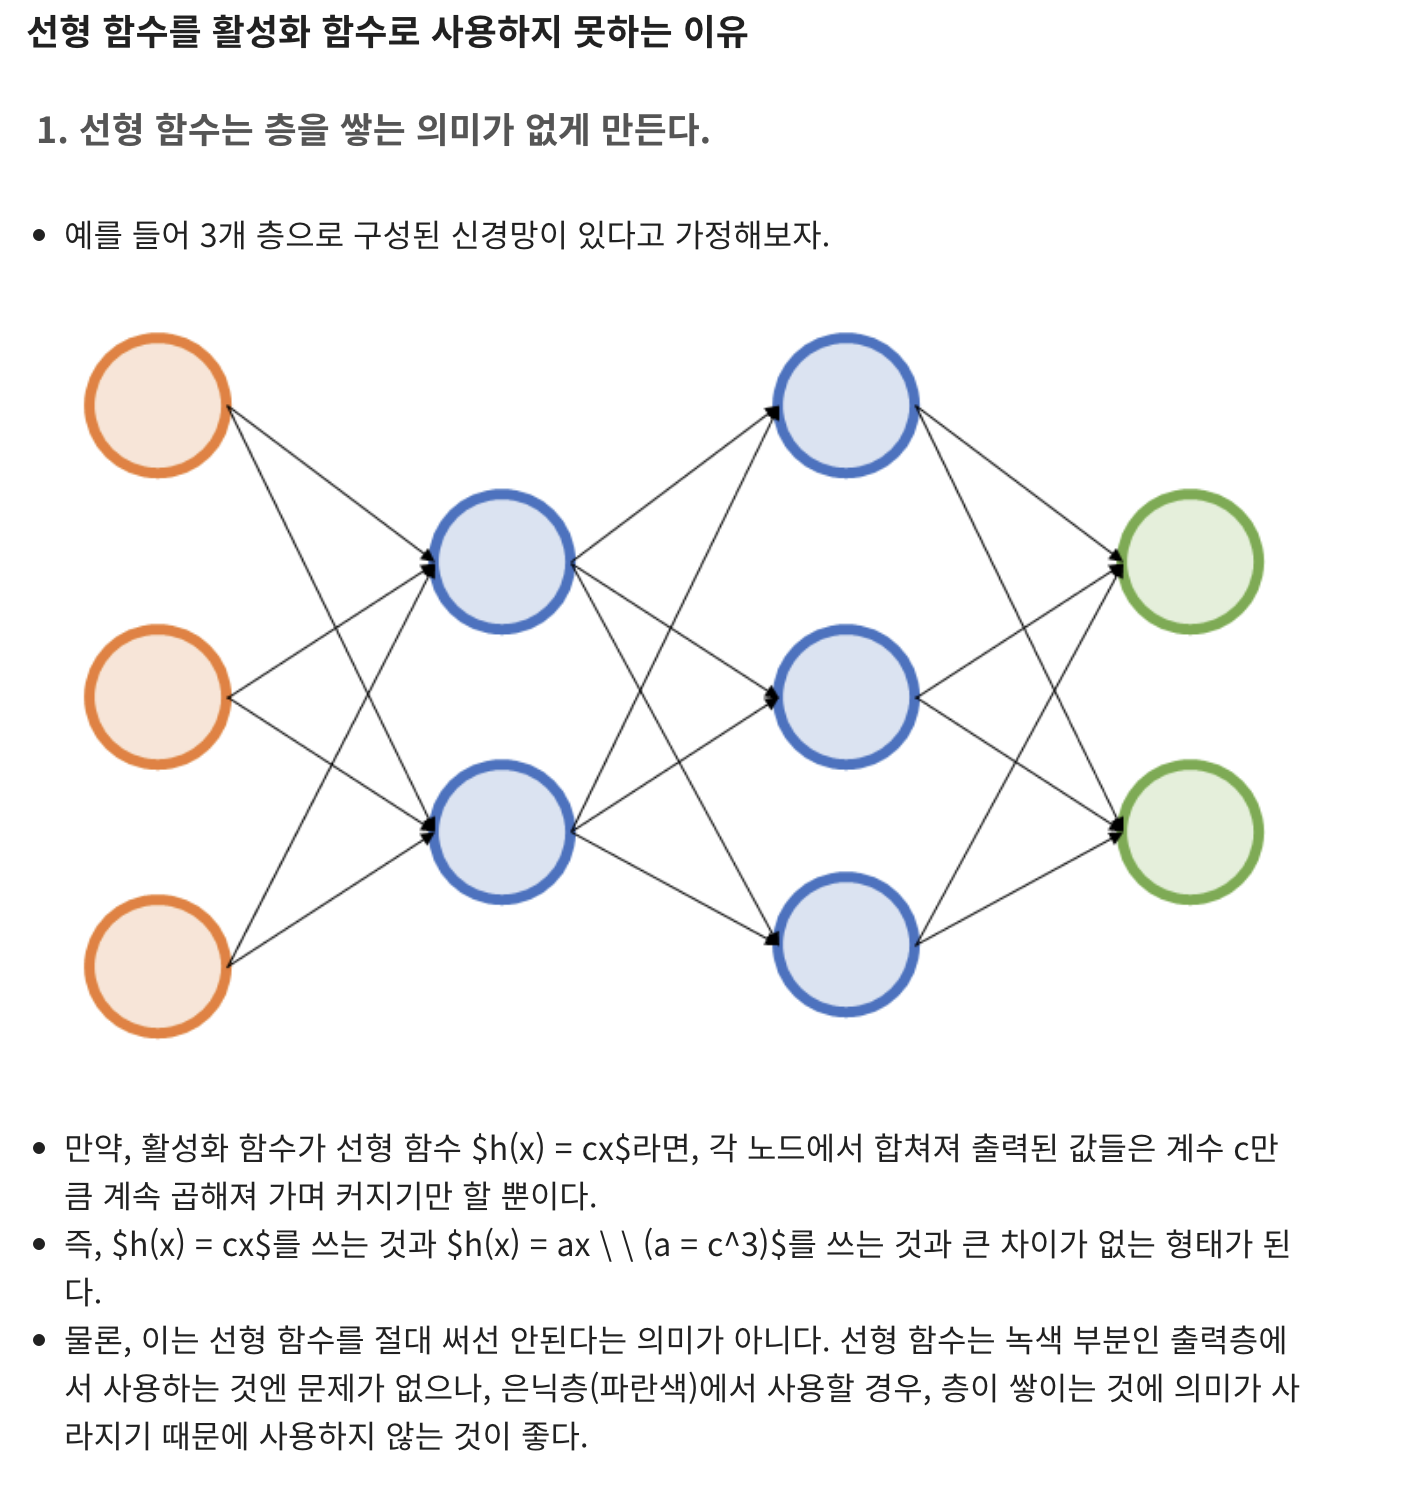

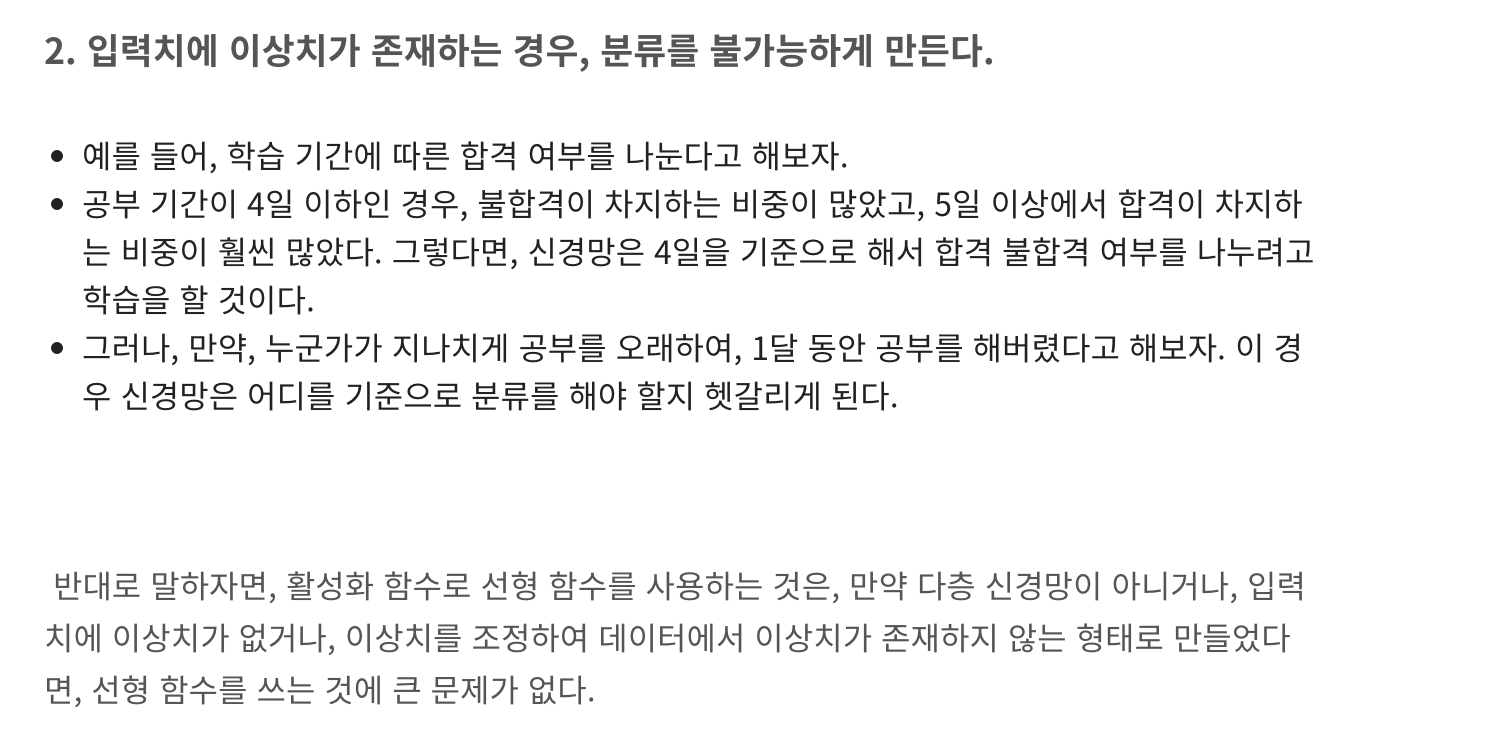

**활성화함수**

딥러닝 네트워크에서 노드에 입력된 값들을 비선형 함수에 통과시킨 후 다음 레이어로 전달하는데, 이 때 사용하는 함수를 활성화 함수(Activation Function)라고 한다.

선형 함수가 아니라 비선형 함수를 사용하는 이유는 딥러닝 모델의 레이어 층을 깊게 가져갈 수 있기 때문이다.

In [ ]:
for step in range(10001):
    optimizer.zero_grad() # gradient 초기화 
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())


0 0.7425906658172607
1000 0.01844877377152443
2000 0.006295155733823776
3000 0.0037646908313035965
4000 0.002679363591596484
5000 0.0020777860190719366
6000 0.001695929211564362
7000 0.0014321692287921906
8000 0.0012391411000862718
9000 0.0010917994659394026
10000 0.0009756846120581031


cost가 현저히 줄어든 것을 확인할 수 있음. 

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ',
          predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[9.311793e-04]
 [9.991309e-01]
 [9.987124e-01]
 [8.125110e-04]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


출력 결과가 거의 0, 1, 1, 0. 정확도 100 

## MLP - 조금 더 깊게 

In [ ]:
# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [ ]:
# model
# 층1->시그->층2->시그->층3->시그->층4->시그
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

# 손실함수
criterion = torch.nn.BCELoss().to(device)

# 최적화 방식 
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1


In [ ]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X) # 위에서 층1 -> 시그 ... 로 설정 

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())

0 0.0001350734382867813
1000 0.00011482017725938931
2000 9.970874089049175e-05
3000 8.804001845419407e-05
4000 7.872599962865934e-05
5000 7.120033842511475e-05
6000 6.492651300504804e-05
7000 5.966606840956956e-05
8000 5.5150747357402e-05
9000 5.12464321218431e-05
10000 4.7878598707029596e-05


10000 0.0009756846120581031 <- 2개의 층짜리 MLP loss 보다 훨씬 좋은 결과가 나옴. 

In [ ]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[3.7257560e-05]
 [9.9994874e-01]
 [9.9995279e-01]
 [5.5763761e-05]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


# *MNIST* 데이터 적용



### 세팅 

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
learning_rate = 0.5
batch_size = 10

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', 
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, # 가져올 데이터 
                                          batch_size=batch_size, 
                                          shuffle=True,
                                          drop_last=True)

## Back Propagation <br> 

시그모이드 함수 사용 시, vanishing gradient problem 발생 <br>
-> ReLU로 교체

In [ ]:
# X.T @ W + B (순전파 시 수행하는 행렬곱 = Affine transformation)
# 그냥 곱하기 , 더하기가 계속 연달아 나오는 것일 뿐. W : 곱 / B : 덧셈
w1 = torch.nn.Parameter(torch.Tensor(784, 30)).to(device) # MNIST input 28*28
b1 = torch.nn.Parameter(torch.Tensor(30)).to(device)
w2 = torch.nn.Parameter(torch.Tensor(30, 10)).to(device)
b2 = torch.nn.Parameter(torch.Tensor(10)).to(device)

torch.nn.init.normal_(w1) 
torch.nn.init.normal_(b1)
torch.nn.init.normal_(w2)
torch.nn.init.normal_(b2)

Parameter containing:
tensor([ 1.0955,  0.6607,  0.0665,  0.6106,  0.8472, -0.1985,  0.2002,  0.4387,
        -0.5780, -0.4606], requires_grad=True)

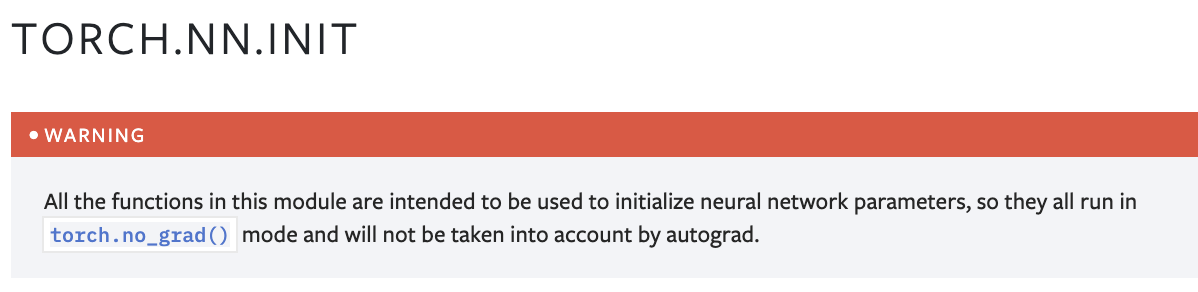

In [ ]:
# 활성화함수: sigomid & sigmoid 미분 
def sigmoid(x):
    #  sigmoid function
    return 1.0 / (1.0 + torch.exp(-x))
    # return torch.div(torch.tensor(1), torch.add(torch.tensor(1.0), torch.exp(-x)))

def sigmoid_prime(x):
    # derivative of the sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)[:1000]
Y_test = mnist_test.test_labels.to(device)[:1000]
i = 0
while not i == 10000:
    for X, Y in data_loader:
        i += 1

        # forward
        X = X.view(-1, 28 * 28).to(device)
        Y = torch.zeros((batch_size, 10)).scatter_(1, Y.unsqueeze(1), 1).to(device)    # one-hot
        l1 = torch.add(torch.matmul(X, w1), b1)
        a1 = sigmoid(l1)
        l2 = torch.add(torch.matmul(a1, w2), b2)
        y_pred = sigmoid(l2)

        diff = y_pred - Y

        ###  Back prop (chain rule) ### 
        d_l2 = diff * sigmoid_prime(l2)
        d_b2 = d_l2
        d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_l2)

        d_a1 = torch.matmul(d_l2, torch.transpose(w2, 0, 1))
        d_l1 = d_a1 * sigmoid_prime(l1)
        d_b1 = d_l1
        d_w1 = torch.matmul(torch.transpose(X, 0, 1), d_l1)

        w1 = w1 - learning_rate * d_w1
        b1 = b1 - learning_rate * torch.mean(d_b1, 0)
        w2 = w2 - learning_rate * d_w2
        b2 = b2 - learning_rate * torch.mean(d_b2, 0)

        if i % 1000 == 0:
            l1 = torch.add(torch.matmul(X_test, w1), b1)
            a1 = sigmoid(l1)
            l2 = torch.add(torch.matmul(a1, w2), b2)
            y_pred = sigmoid(l2)
            acct_mat = torch.argmax(y_pred, 1) == Y_test
            acct_res = acct_mat.sum()
            print(acct_res.item())

        if i == 10000:
            break

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


732
780
791
808
813
824
822
823
815
824


## Softmax + SLP

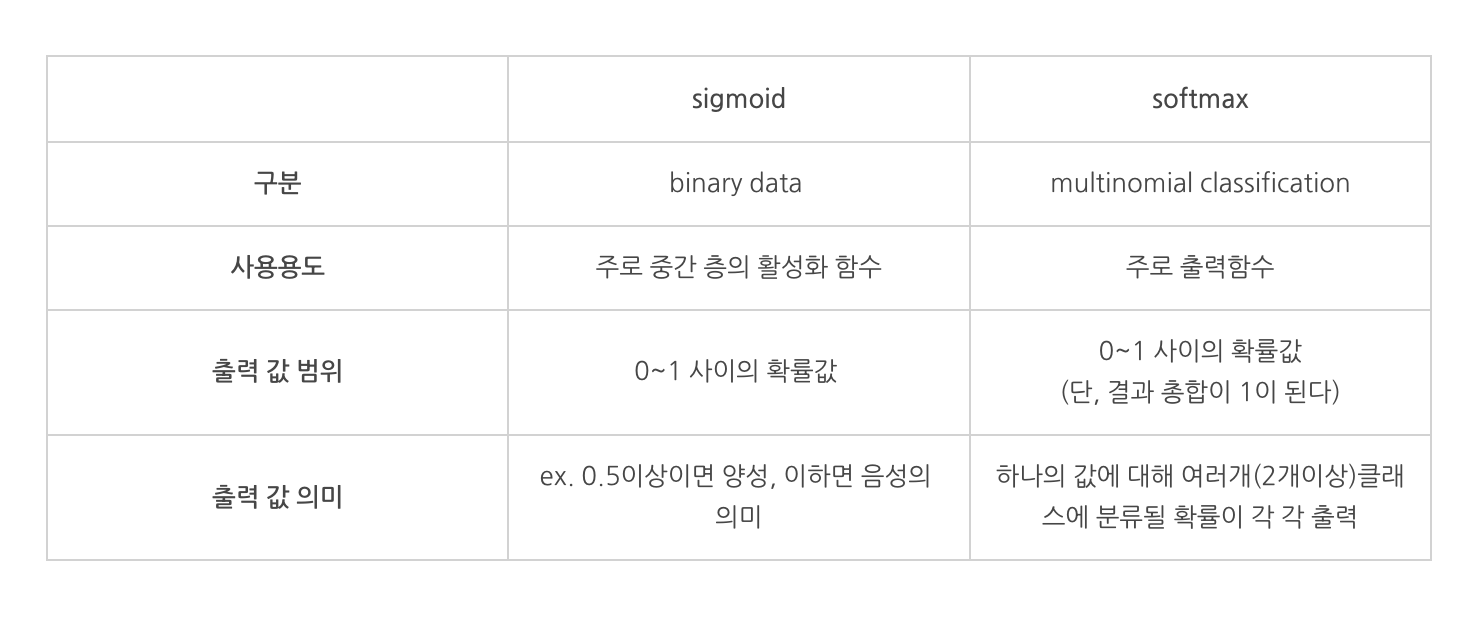

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
# MNIST data image of shape 28 * 28 = 784
# model 
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# Initialization
torch.nn.init.normal_(linear.weight) # 가중치를 정규분포로 초기화

# 손실함수 : CEE 
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax가 내장되어 있음 

# 최적화방식 : Adam으로 해봄 (SGD 말고)
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y) # 우리 출력값, 정답 간의 cost 
        cost.backward()                 # gradient 계산 
        optimizer.step()                # parameter 업데이트 

        avg_cost += cost / total_batch  

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')


Epoch: 0001 cost = 0.274917036
Epoch: 0002 cost = 0.274917543
Epoch: 0003 cost = 0.274918020
Epoch: 0004 cost = 0.274917424
Epoch: 0005 cost = 0.274917096
Epoch: 0006 cost = 0.274917334
Epoch: 0007 cost = 0.274917573
Epoch: 0008 cost = 0.274917752
Epoch: 0009 cost = 0.274917066
Epoch: 0010 cost = 0.274916828
Epoch: 0011 cost = 0.274917513
Epoch: 0012 cost = 0.274916738
Epoch: 0013 cost = 0.274917096
Epoch: 0014 cost = 0.274916857
Epoch: 0015 cost = 0.274917960
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.8761000037193298
Label:  3
Prediction:  3


## ReLU + MLP 

In [ ]:
# nn layers : 여러 개로 늘어남 
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.5667,  1.2386, -1.1016,  ...,  0.9861,  1.3791, -0.6773],
        [-0.8024, -0.2683,  0.7389,  ..., -0.8476, -0.9091,  0.1708],
        [ 1.2976, -0.4412,  0.0549,  ..., -0.5288,  3.1659,  1.0605],
        ...,
        [-1.2727,  0.6962, -0.2259,  ..., -1.5444, -0.5086,  0.8349],
        [ 0.8438, -0.3103,  0.1790,  ..., -0.6018, -0.6063, -2.2976],
        [ 1.3167, -1.8682, -0.5158,  ...,  0.7136, -1.5148, -2.5153]],
       requires_grad=True)

In [ ]:
# model: 선형1 -> 렐루 -> 선형2 -> 렐루 -> 선형 3 
#        맨 마지막에 렐루가 없는 이유는, 손실함수가 CEE라 Softmax로 끝나야하기 때문. 
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# 손실함수 
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.

# 최적화 방식 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 62.964904785
Epoch: 0002 cost = 13.959506989
Epoch: 0003 cost = 7.196975708
Epoch: 0004 cost = 4.486959457
Epoch: 0005 cost = 2.922973394
Epoch: 0006 cost = 2.190317631
Epoch: 0007 cost = 1.770695210
Epoch: 0008 cost = 1.465285301
Epoch: 0009 cost = 1.269311428
Epoch: 0010 cost = 1.104723930
Epoch: 0011 cost = 0.948926628
Epoch: 0012 cost = 0.863413930
Epoch: 0013 cost = 0.855360210
Epoch: 0014 cost = 0.706352949
Epoch: 0015 cost = 0.662438393
Learning finished


-> SLP + softmax 보다 MLP + ReLU가 훨씬 성능이 좋음 

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())


Accuracy: 0.9674999713897705
Label:  6
Prediction:  6
